In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [2]:
file_path = "/content/sample_data/housing.csv"


In [5]:
#Getting the data
data = pd.read_csv(file_path)


In [6]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [8]:
#Taking a look at the data
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
#Getting all unique values from 'ocean_proximity'
data["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [12]:
#Checking for percentage of null values in each column
missing_values = data.isnull().sum()
print((missing_values/len(data))*100)


longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


In [13]:
#Cleaning the data set of null values
cleaned_data = data.dropna()

In [15]:
print(cleaned_data.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [16]:
cleaned_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


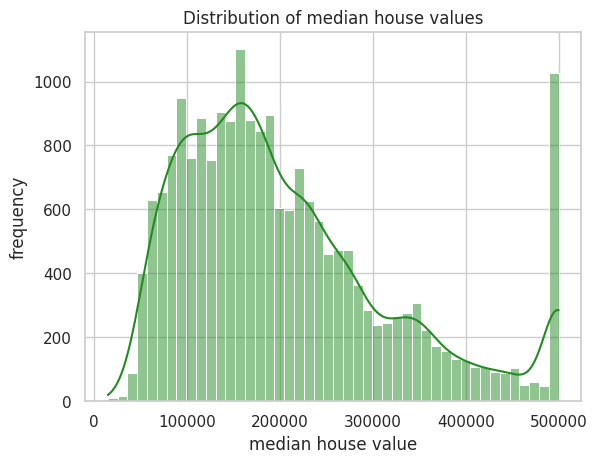

In [18]:
#Checking for outliers in 'median_house_value'
sns.set(style='whitegrid')
sns.histplot(cleaned_data['median_house_value'],color='forestgreen',kde=True)
plt.title('Distribution of median house values')
plt.xlabel('median house value')
plt.ylabel('frequency')
plt.show()

In [19]:
#Removing outliers
Q1=cleaned_data['median_house_value'].quantile(0.25)
Q3=cleaned_data['median_house_value'].quantile(0.75)
IQR = Q3-Q1
lower_bound= Q1 - 1.5*IQR
upper_bound= Q3 + 1.5*IQR
data_no_outliers = cleaned_data[(cleaned_data['median_house_value'] >= lower_bound) & (cleaned_data['median_house_value'] <= upper_bound) ]
data_no_outliers.shape

(19369, 10)

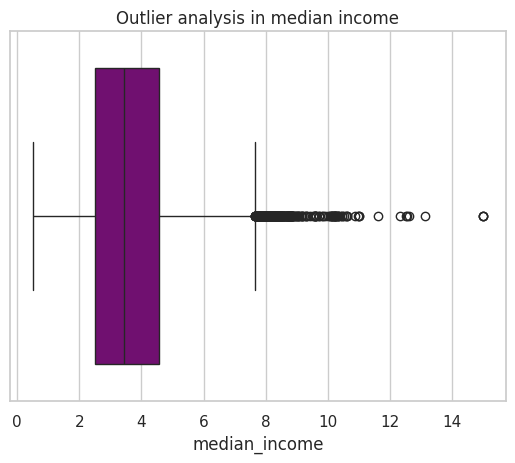

In [21]:
#Checking for outliers in 'median_income'
sns.boxplot(x=data_no_outliers['median_income'],color='purple')
plt.title('Outlier analysis in median income')
plt.xlabel('median_income')
plt.show()

In [22]:
#Removing outliers
from typing_extensions import dataclass_transform
Q1 = data_no_outliers['median_income'].quantile(0.25)
Q3 = data_no_outliers['median_income'].quantile(0.75)
IQR2= Q3 -Q1
lower_bound = Q1 - 1.5*IQR2
upper_bound = Q3 + 1.5*IQR2
data_no_outliers2= data_no_outliers[(data_no_outliers['median_income'] >= lower_bound) & (data_no_outliers['median_income'] <= upper_bound)]
data = data_no_outliers2
data_no_outliers2.shape

(19026, 10)

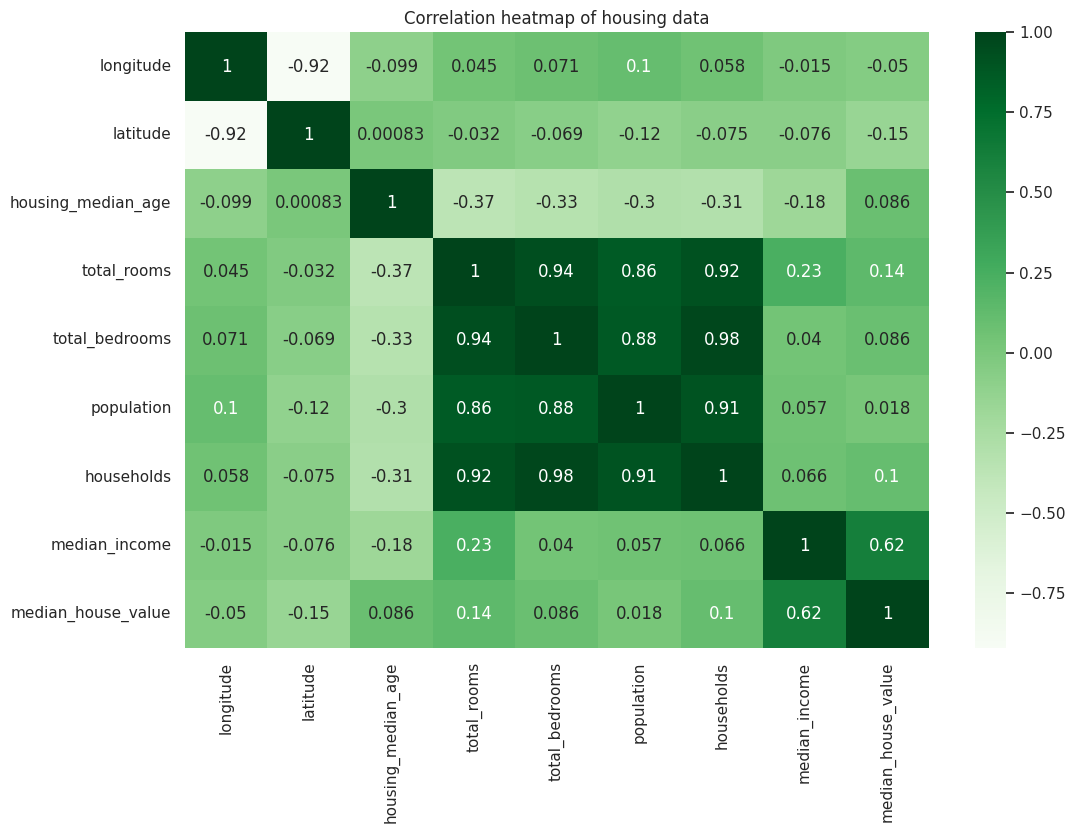

In [23]:
#Correlation Analysis
#data1 = data.pivot("longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value")
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(numeric_only=True),annot=True,cmap='Greens')
plt.title('Correlation heatmap of housing data')
plt.show()

In [24]:
data=data.drop("total_bedrooms",axis=1)
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity'],
      dtype='object')

In [25]:
ocean_proximity_dummies=pd.get_dummies(data['ocean_proximity'],prefix='ocean_proximity', dtype=int)
data=pd.concat([data.drop("ocean_proximity",axis=1),ocean_proximity_dummies],axis=1)
ocean_proximity_dummies

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
5,0,0,0,1,0
6,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [26]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [27]:
data=data.drop("ocean_proximity_ISLAND",axis=1)
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [28]:
data.head()


,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,0,0,1,0
5,-122.25,37.85,52.0,919.0,413.0,193.0,4.0368,269700.0,0,0,1,0
6,-122.25,37.84,52.0,2535.0,1094.0,514.0,3.6591,299200.0,0,0,1,0


In [29]:
X = data.drop("median_house_value",axis=1)
y = data['median_house_value']


In [33]:
#Splitting into test and train datasets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1111)

In [34]:
X_train_const = sm.add_constant(X_train)
X_train_const

,const,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
15578,1.0,-116.90,33.03,11.0,3213.0,1975.0,579.0,3.4750,1,0,0,0
1656,1.0,-121.93,37.89,13.0,2085.0,852.0,264.0,7.3445,0,1,0,0
9190,1.0,-118.35,34.32,52.0,102.0,54.0,32.0,1.9875,1,0,0,0
11839,1.0,-120.95,39.93,26.0,2023.0,922.0,365.0,2.8125,0,1,0,0
12267,1.0,-116.91,33.75,13.0,10886.0,4266.0,1955.0,2.3169,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15355,1.0,-117.32,33.25,7.0,8206.0,4399.0,1423.0,3.6301,1,0,0,0
9608,1.0,-120.51,37.29,20.0,4927.0,4205.0,1009.0,1.7679,0,1,0,0
12606,1.0,-121.49,38.50,32.0,2364.0,1331.0,449.0,3.3190,0,1,0,0
2907,1.0,-119.03,35.37,52.0,1503.0,554.0,277.0,1.6786,0,1,0,0


In [35]:
#Training the model
model_fitted=sm.OLS(y_train,X_train_const).fit()
print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     1973.
Date:                Mon, 01 Jul 2024   Prob (F-statistic):               0.00
Time:                        09:28:54   Log-Likelihood:            -1.8879e+05
No. Observations:               15220   AIC:                         3.776e+05
Df Residuals:                   15208   BIC:                         3.777e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [36]:
#Predictions
X_test_const = sm.add_constant(X_test)
test_predictions=model_fitted.predict(X_test_const)
test_predictions


7322     153414.201880
465      239312.044180
12768     70054.781175
2617     189568.171319
13351    184267.795032
             ...      
11691    171568.742378
1454     215893.783794
7360     129935.765388
19118    232846.312809
13084    207120.213485
Length: 3806, dtype: float64

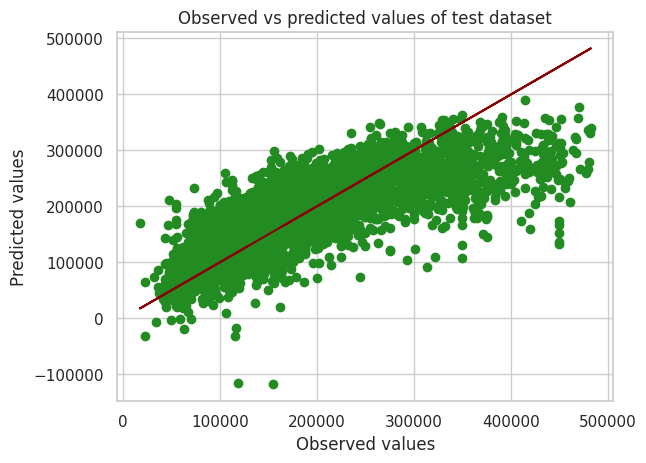

In [37]:
plt.scatter(y_test,test_predictions,color="forestgreen")
plt.xlabel("Observed values")
plt.ylabel("Predicted values")
plt.title("Observed vs predicted values of test dataset")
plt.plot(y_test,y_test,color="darkred")
plt.show()


In [38]:
mean_residuals=np.mean(model_fitted.resid)
print(f"The mean of the residuals is : {np.round(mean_residuals),2}")

The mean of the residuals is : (0.0, 2)


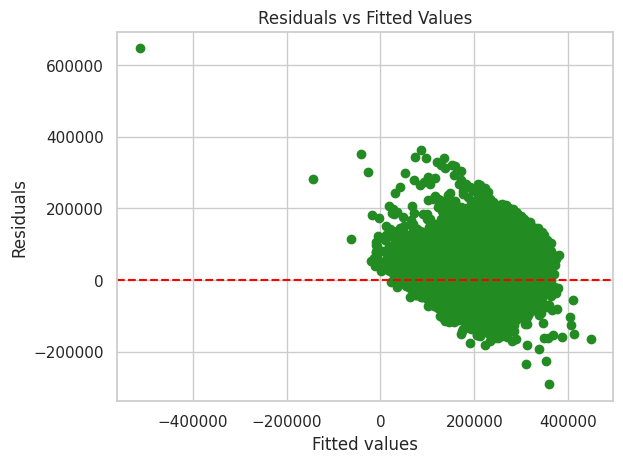

In [39]:
plt.scatter(model_fitted.fittedvalues,model_fitted.resid,color='forestgreen')
plt.axhline(y=0,color='red',linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

In [40]:
residuals = model_fitted.resid

for column in X_train.columns:
 corr_coefficient = np.corrcoef(X_train[column],residuals)[0,1]
 print(f"Correlation between residuals and {column} : {np.round(corr_coefficient,2)}")

Correlation between residuals and longitude : -0.0
Correlation between residuals and latitude : 0.0
Correlation between residuals and housing_median_age : -0.0
Correlation between residuals and total_rooms : 0.0
Correlation between residuals and population : 0.0
Correlation between residuals and households : 0.0
Correlation between residuals and median_income : 0.0
Correlation between residuals and ocean_proximity_<1H OCEAN : -0.0
Correlation between residuals and ocean_proximity_INLAND : 0.0
Correlation between residuals and ocean_proximity_NEAR BAY : -0.0
Correlation between residuals and ocean_proximity_NEAR OCEAN : 0.0


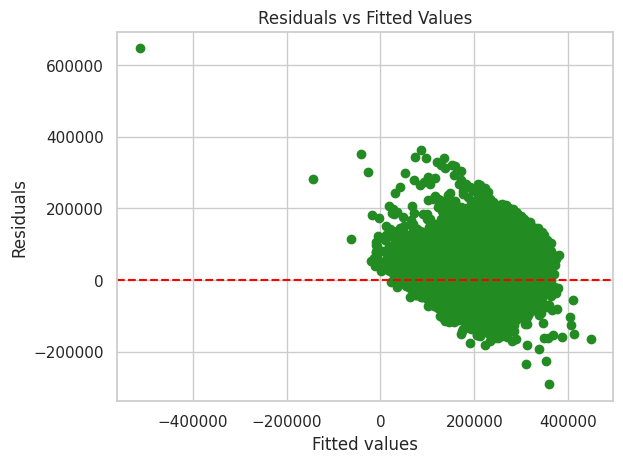

In [41]:
plt.scatter(model_fitted.fittedvalues,model_fitted.resid,color='forestgreen')
plt.axhline(y=0,color='red',linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

lr = LinearRegression()
lr.fit(X_train_scaled,y_train)
y_pred = lr.predict(X_test_scaled)

mse = mean_squared_error(y_pred,y_test)
rmse = sqrt(mse)

print(f'mse on test set : {mse}')
print(f'rmse on test set : {rmse}')


mse on test set : 3527427465.5495896
rmse on test set : 59392.14986468826
